#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 5
#### Topics:
- Contrasts
- Multiple TestinFalse-Discovery Rate
- Simple Regression

#### Due: 24/05/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>

**Name**: Ofir Nesher

**Student ID**: 204502926

**Date**: 13/05/2022

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (Multiple testing in Practice)
#### Continuation of Problem 4 from HW4

In HW4, Problem 4 you used ANOVA to measure the effect of the winery (``winery``) on the quality (``points``) of wines from variety (``variety``) ``Cabernet Sauvignon``. Using the same dataset (reduced to Israeli wines and a specific variety). You used all t-tests involving pairs of wineries and reported pairs found significant after a Bonfferoni's correction. In this question, you will use Binjamini-Hochberg's (BH) FDR controlling procedure as an alternative to Bonfferoni.
 1. Using HW4, Problem 4, consider P-values from all t-tests of pairs of wineries. Sort the P-values from small to large and plot the smallest 10% of the sorted list of P-values on a stem or a scatter plot in which the x-axis indicate the P-value rank (left most point is rank = 1, i.e., the smallest) and the y-axis the P-value's value.
 2. Assume that different tests are independent; apply BH to select a set of winery pairs in which one winery is significantly better than the others while aiming for 0.05 false pairs. How many pairs were reported? is it more or less pairs than you discovered using Bonfferoni correction in HW4, Problem 4?
 3. Repeat the last item without the independence assumption, i.e., use the harmonic sum correction.
 
The point: FDR controlling using BH is a more liberal (less conservative) approach to identify significant discoveries in the sense that it allows us to report on more discoveries if we are willing to replace family-wise error rate control with an expected false-discovery proportion guarantee.

### **Answers**:

#### 1.

In [67]:
import pandas as pd
import numpy as np

In [68]:
wine_df = pd.read_csv('winemag-data_first150k.csv')
wine_df = wine_df[(wine_df['country'] == 'Israel') & (wine_df['variety'] == 'Cabernet Sauvignon')]
all_wineries = wine_df['winery'].value_counts() > 1
valid_wineries = list(all_wineries[all_wineries].index.values)
wine_df = wine_df[wine_df['winery'].isin(valid_wineries)]
print(wine_df.describe())

          Unnamed: 0      points       price
count     135.000000  135.000000  128.000000
mean    61128.814815   87.688889   35.601562
std     41325.606285    2.303361   16.290831
min        81.000000   80.000000   12.000000
25%     28743.000000   86.000000   21.750000
50%     52552.000000   88.000000   36.000000
75%     91863.000000   90.000000   42.000000
max    150558.000000   91.000000   75.000000


In [69]:
# All possible pairs in List
# Using list comprehension + enumerate()
all_pairs = [(a, b) for idx, a in enumerate(valid_wineries) for b in valid_wineries[idx + 1:]]
all_pairs[:5]

[('Barkan', 'Recanati'),
 ('Barkan', 'Carmel'),
 ('Barkan', 'Golan Heights Winery'),
 ('Barkan', "Segal's"),
 ('Barkan', 'Yatir')]

In [70]:
def pair_ttest(y_0, y_1):
    n_0 = len(y_0)
    n_1 = len(y_1)
    mu_0 = np.mean(y_0)
    mu_1 = np.mean(y_1)
    degrees_of_freedom = n_0 + n_1 - 2
    s = (np.sum((y_0 - mu_0) ** 2) + np.sum((y_1 - mu_1) ** 2)) / degrees_of_freedom

    if s <= 0:
        s = 1e-6

    numerator = mu_1 - mu_0
    denominator = s * np.sqrt((1 / n_0) + (1 / n_1))
    t = numerator / denominator

    return t, degrees_of_freedom

In [71]:
from scipy.stats import t as ttest

p_values = []

for w_0, w_1 in all_pairs:
    y_0 = wine_df.loc[wine_df['winery'] == w_0, 'points']
    y_1 = wine_df.loc[wine_df['winery'] == w_1, 'points']
    t, degrees_of_freedom = pair_ttest(y_0, y_1)
    p_value = ttest.sf(abs(t), degrees_of_freedom)
    p_values.append(p_value)

In [72]:
p_values.sort()
percentage = 10
sub_list_length = int(len(p_values) / percentage)
sub_list_p_values = p_values[:sub_list_length]
sub_list_p_values

[1.2499999999993453e-39,
 3.799434915962711e-33,
 1.6010787464791773e-32,
 8.388202017389364e-19,
 4.999999999992501e-13,
 1.113463502004311e-05,
 1.4790037715200972e-05,
 7.842469586091886e-05,
 9.75861303691789e-05,
 0.000176221655208138,
 0.0003583107405011393,
 0.0004034063398728557,
 0.0005515750191262024,
 0.0013225198039814171,
 0.0022180816127770234,
 0.0025900245277955397,
 0.003150531600133884]

In [73]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 7)
plt.rcParams.update({'font.size': 18})

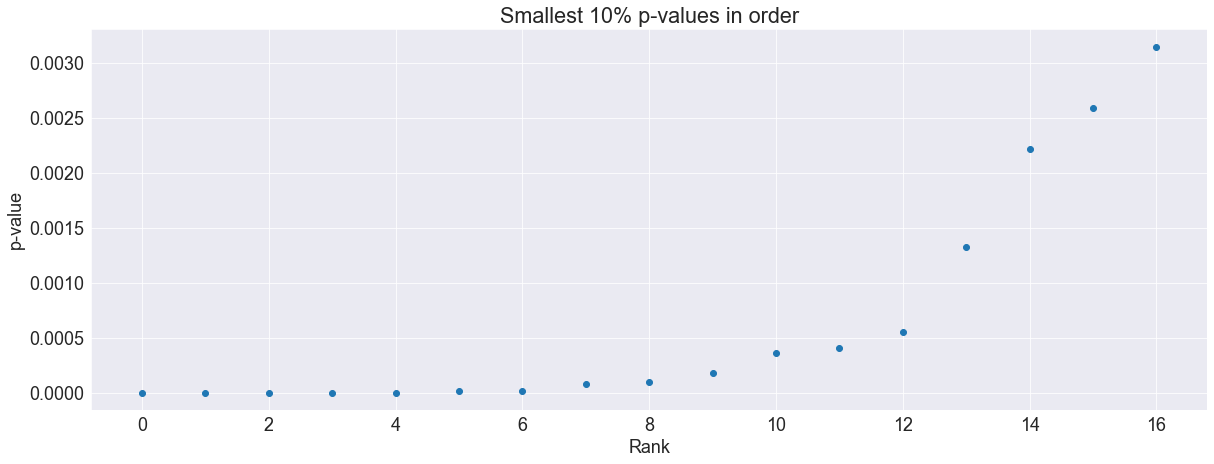

In [74]:
x_axis = range(sub_list_length)
plt.scatter(x_axis, sub_list_p_values)
plt.xlabel('Rank')
plt.ylabel('p-value')
plt.title(f'Smallest {percentage}% p-values in order')
plt.show()

#### 2.
Assume that different tests are independent; apply BH to select a set of winery pairs in which one winery is significantly better than the others while aiming for 0.05 false pairs. How many pairs were reported? is it more or less pairs than you discovered using Bonfferoni correction in HW4, Problem 4?

In [75]:
aimed_false_pairs_percentage = 0.05


In [76]:
p_values_below = list(filter(lambda x: x < (aimed_false_pairs_percentage / 2), p_values))
print(f'There are {len(p_values_below)} false pairs.\n'
      f'It is MORE/LESS pairs than we discovered using Bonfferoni correction in HW4, Problem 4.')

There are 34 false pairs.
It is MORE/LESS pairs than we discovered using Bonfferoni correction in HW4, Problem 4.


#### 3.
Repeat the last item without the independence assumption, i.e., use the harmonic sum correction.

---

## Problem 2 (contrasts)
#### Continuation of Problem 1

Using a single t-test, test the assumption that the average of the Golan area wineries: ``Bazelet HaGolan``, ``Gamla``, ``Golan Heights Winery`` have the same quality as the average of Judean Hills area wineries: ``Katlav``, ``Psagot``, ``Shiloh Winery``, ``Titora``, ``Yatir`` (the goal here is to construct a "contrast", hence you should take an arithmetic average of group averages. You should only consider the size of each individual group when evaluating the variance of the contrast).

Note: you can ignore the ``province`` filed in the data because it contains inaccurate information. You should also ignore the fact that in reality, ``Gamla`` is produced by ``Golan Heights Winery``.

### **Answers**:

---

## Problem 3 (Exact size of Bonferroni's test)
Suppose that we run multiple tests with independent data and obtain P-values $p_1,\ldots,p_n$. We wish to test the null hypothesis:
$$
H_0\,:\,\text{All tests are null}
$$
at the level $\alpha$ (e.g., $\alpha=0.05$). In class, we introduced Bonferroni's procedure which is equivalent to: Reject $H_0$ if $\min p_i \leq \alpha/n$. 
1. Show that the  size of the test in Bonferroni's procedure is at most $\alpha$, regardless if the hypotheses are independent or not. 
2. Assuming that the hypotheses are independent, find the exact size of the test in Bonferroni's procedure. 
3. For $\alpha=0.05$, evaluate the difference between $\alpha$ and the exact test's size for $n=2,...,50$. Discuss what you see.

### **Answers**:

#### 1.

---

## Problem 4 (Prediction in Simple Regression)
Consider the linear model:
$$
    y_i = \beta_0 + \beta_1 x_i + \epsilon_i,\qquad \epsilon_i \simiid \Ncal(0,\sigma^2)
$$
$$
    Z = \begin{pmatrix}
    1 & x_1 \\
    \vdots & \vdots \\
    1 & x_n
    \end{pmatrix},\quad \beta=\begin{pmatrix}
    \beta_0 \\
    \beta_1
    \end{pmatrix},\qquad \hat{\beta}=(Z^\top Z)^{-1} Z^\top y
$$
Suppose we get a new data point $x_{n+1}$ and want to predict $y_{n+1}$. We want an interval in which this prediction will likely to land. In class, we used that 
$$
\var[\hat{\beta}_0 + \hat{\beta}_1 x] = \frac{\sigma^2}{n} \left( \frac{1}{n} + \frac{(x-\bar{x})^2}{S_{XX }}\right)
$$
to obtain a confidence interval for $\beta_0 + \beta_1 x$, and a confidence band for all $x \in \reals$. In this question, you will use a similar reasoning to get a confidence interval (and bands) for $y_{n+1}$.
1. Find the variance of $y_{n+1} - (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})$ in terms of $\sigma^2$ and $x_1,\ldots,x_n$ and $x_{n+1}$ (you can use $\bar{x}$ and $S_{XX}$ or any other well-defined function of $x_1,\ldots,x_n$). Explain intuitively why it makes sense that this variance is larger than the variance of  $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$.
2. Find a $1-\alpha$ confidence interval for $y_{n+1}$. Is this interval wider or narrower than that of $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$? For what value of $x_{n+1}$ this interval is the narrowest?
3. Suppose that we take the average of two responses $y$'s at the same $x_{n+1}$, say 
$$
y_{n+1} =  \frac{y_{n+1}^{(1)} + y_{n+1}^{(2)}}{2}, 
$$
where
$$
y_{n+1}^{(1)} = \beta_0 + \beta_1 x_{n+1} + \epsilon_{n+1}^{(1)}
$$
and 
$$
y_{n+1}^{(2)} = \beta_0 + \beta_1 x_{n+1} + \epsilon_{n+1}^{(2)},
$$
where $\epsilon_{n+1}^{(1)}$ and $\epsilon_{n+1}^{(2)}$ are independent. Find a confidence interval for $y_{n+1}$. Is it wider or narrower than the interval in (2) ?

Note: The confidence interval you derived in 2 is somewhat risky to use because it makes the strong assumption that $\epsilon_{n+1}$ is normal. This is compared to, say, confidence intervals for $\hat{\beta}_0$ and $\hat{\beta}_1$ which rely on averages over all observations $y_1,\ldots,y_n$, so we can use the Central Limit Theorem to argue for normality. Things get better both in terms of variance and normality assumption when you can take multiple measurements at the same $x_{n+1}$ and average those.

### **Answers**:

#### 1.